# 순환 신경망 - 나비야
#### 출처: [순환 신경망 모델 만들어보기](https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/)

## 상태유지 LSTM 모델
- 상태유지 모드에서는 현재 샘플의 학습 상태가 다음 샘플의 초기 상태로 전달된다.

In [1]:
# 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [2]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [3]:
# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [4]:
# 데이터 준비하기

# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [5]:
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [6]:
# 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)
dataset.shape

(50, 5)

In [7]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

MAX_IDX_VALUE = 13

In [8]:
# 입력값 정규화 시키기
x_train = x_train / float(MAX_IDX_VALUE)
x_train.shape

(50, 4)

In [9]:
# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

In [10]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

In [24]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [11]:
# 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))

W0813 21:22:58.349040  9872 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 21:22:58.377022  9872 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 21:22:58.381020  9872 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0813 21:23:12.747829  9872 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 21:23:12.871778  9872 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [25]:
# 모델 학습시키기
num_epochs = 201
history = LossHistory()
history.init()

for epoch_idx in range(num_epochs):
    if epoch_idx % 50 == 0:
        print("======================= " + str(epoch_idx) + " =======================")
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False,
              callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()


=======================0=======================
Epoch 1/1
 - 0s - loss: 0.0023 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0129 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0779 - acc: 0.9800
Epoch 1/1
 - 0s - loss: 0.4101 - acc: 0.8800
Epoch 1/1
 - 0s - loss: 0.9128 - acc: 0.7800
Epoch 1/1
 - 0s - loss: 2.6891 - acc: 0.4200
Epoch 1/1
 - 0s - loss: 0.7331 - acc: 0.7400
Epoch 1/1
 - 0s - loss: 0.5350 - acc: 0.8200
Epoch 1/1
 - 0s - loss: 0.5185 - acc: 0.8600
Epoch 1/1
 - 0s - loss: 0.2663 - acc: 0.9200
Epoch 1/1
 - 0s - loss: 0.2280 - acc: 0.9400
Epoch 1

Epoch 1/1
 - 0s - loss: 0.4712 - acc: 0.8200
Epoch 1/1
 - 0s - loss: 0.2181 - acc: 0.9400
Epoch 1/1
 - 0s - loss: 0.2098 - acc: 0.9400
Epoch 1/1
 - 0s - loss: 0.1943 - acc: 0.9800
Epoch 1/1
 - 0s - loss: 0.2322 - acc: 0.8800
Epoch 1/1
 - 0s - loss: 0.8333 - acc: 0.7800
Epoch 1/1
 - 0s - loss: 0.3548 - acc: 0.8200
Epoch 1/1
 - 0s - loss: 0.4731 - acc: 0.8600
Epoch 1/1
 - 0s - loss: 0.1792 - acc: 0.9000
Epoch 1/1
 - 0s - loss: 0.1263 - acc: 0.9800
Epoch 1/1
 - 0s - loss: 0.1407 - acc: 0.9600
Epoch 1/1
 - 0s - loss: 0.1260 - acc: 0.9600
Epoch 1/1
 - 0s - loss: 0.3486 - acc: 0.8200
Epoch 1/1
 - 0s - loss: 0.6378 - acc: 0.8200
Epoch 1/1
 - 0s - loss: 0.4634 - acc: 0.8800
Epoch 1/1
 - 0s - loss: 0.4318 - acc: 0.8600
Epoch 1/1
 - 0s - loss: 0.2718 - acc: 0.8800
Epoch 1/1
 - 0s - loss: 0.2056 - acc: 0.9000
Epoch 1/1
 - 0s - loss: 0.1073 - acc: 0.9800
Epoch 1/1
 - 0s - loss: 0.0786 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0555 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0506 - acc: 1.0000
Epoch 1/1


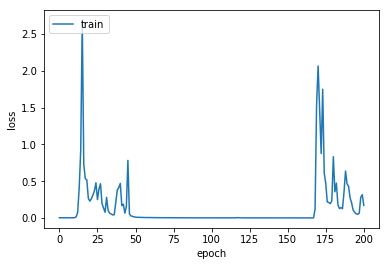

In [26]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [16]:
# 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

50/50 [==============================] - 0s 3ms/step
acc: 100.00%


In [17]:
# 모델 사용하기
pred_count = 50   # 최대 예측 개수 정의

In [19]:
# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
model.reset_states()

print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### [노래 듣기](http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f1_one_step_prediction.mp3)

In [20]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(MAX_IDX_VALUE) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(MAX_IDX_VALUE))
    seq_in.pop(0)
model.reset_states()
    
print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### [노래듣기](http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f1_full_song_prediction.mp3)